# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [4]:
cities

['ongandjera',
 'port alfred',
 'waipawa',
 'cabo san lucas',
 'benton harbor',
 'ushuaia',
 'varkaus',
 'dongying',
 'quatre cocos',
 'taft',
 'qaanaaq',
 'pevek',
 'talnakh',
 'sonkovo',
 'san patricio',
 'aripuana',
 'constitucion',
 'yellowknife',
 'owando',
 'bundaberg',
 'nikolskoye',
 'busselton',
 'vaini',
 'roma',
 'hermanus',
 'saskylakh',
 'rikitea',
 'novo aripuana',
 'egvekinot',
 'atuona',
 'te anau',
 'tasiilaq',
 'ilulissat',
 'belushya guba',
 'nome',
 'namibe',
 'illoqqortoormiut',
 'shostka',
 'aswan',
 'mnogovershinnyy',
 'kapaa',
 'ponta do sol',
 'tuktoyaktuk',
 'vondrozo',
 'hithadhoo',
 'cherskiy',
 'saldanha',
 'poum',
 'jamestown',
 'sayyan',
 'hobart',
 'avarua',
 'georgetown',
 'airai',
 'deputatskiy',
 'saint-pierre',
 'pisco',
 'umm kaddadah',
 'chuy',
 'santa maria',
 'caravelas',
 'port elizabeth',
 'klaksvik',
 'rabo de peixe',
 'cape town',
 'camacha',
 'nizhniy baskunchak',
 'samarai',
 'inhambane',
 'taolanaro',
 'barrow',
 'nishihara',
 'chapais',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
dt = []
cities_found = []

# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval\n-----------------------------')
for city in cities:
    print(f'Processing Record {cities.index(city)+1} | {city}')
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        cities_found.append(city)
    except:
        print('City not found. Skipping...')
        
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | ongandjera
Processing Record 2 | port alfred
Processing Record 3 | waipawa
Processing Record 4 | cabo san lucas
Processing Record 5 | benton harbor
Processing Record 6 | ushuaia
Processing Record 7 | varkaus
Processing Record 8 | dongying
Processing Record 9 | quatre cocos
Processing Record 10 | taft
Processing Record 11 | qaanaaq
Processing Record 12 | pevek
Processing Record 13 | talnakh
Processing Record 14 | sonkovo
Processing Record 15 | san patricio
Processing Record 16 | aripuana
Processing Record 17 | constitucion
Processing Record 18 | yellowknife
Processing Record 19 | owando
Processing Record 20 | bundaberg
Processing Record 21 | nikolskoye
Processing Record 22 | busselton
Processing Record 23 | vaini
Processing Record 24 | roma
Processing Record 25 | hermanus
Processing Record 26 | saskylakh
Processing Record 27 | rikitea
Processing Record 28 | novo aripuana
Processing Record 29 | egvekinot
Process

Processing Record 238 | abu samrah
Processing Record 239 | nyakahanga
Processing Record 240 | rawson
Processing Record 241 | thinadhoo
Processing Record 242 | coahuayana
Processing Record 243 | anadyr
Processing Record 244 | alofi
Processing Record 245 | oriximina
Processing Record 246 | lichuan
Processing Record 247 | galiwinku
City not found. Skipping...
Processing Record 248 | flinders
Processing Record 249 | saint anthony
Processing Record 250 | neuquen
Processing Record 251 | sola
Processing Record 252 | kavieng
Processing Record 253 | tsihombe
City not found. Skipping...
Processing Record 254 | bantou
Processing Record 255 | biloela
Processing Record 256 | kudahuvadhoo
Processing Record 257 | dwarka
Processing Record 258 | black river
Processing Record 259 | lira
Processing Record 260 | san antonio
Processing Record 261 | cap-chat
Processing Record 262 | bilma
Processing Record 263 | arlit
Processing Record 264 | chokurdakh
Processing Record 265 | saint george
Processing Record 2

Processing Record 472 | chhagalnaiya
Processing Record 473 | eureka
Processing Record 474 | codrington
Processing Record 475 | miquelon
Processing Record 476 | khonuu
City not found. Skipping...
Processing Record 477 | kaniama
Processing Record 478 | constantine
Processing Record 479 | axim
Processing Record 480 | sacapulas
Processing Record 481 | miri
Processing Record 482 | louisbourg
City not found. Skipping...
Processing Record 483 | ngaoundere
Processing Record 484 | mandalgovi
Processing Record 485 | charleston
Processing Record 486 | sobolevo
Processing Record 487 | bereda
Processing Record 488 | byron bay
Processing Record 489 | novaya ladoga
Processing Record 490 | pathein
Processing Record 491 | kirakira
Processing Record 492 | vidalia
Processing Record 493 | narsaq
Processing Record 494 | waterloo
Processing Record 495 | grand river south east
City not found. Skipping...
Processing Record 496 | marsh harbour
Processing Record 497 | nawashahr
Processing Record 498 | komsomols

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
cities_dict = {
    "City": cities_found,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": dt
}
cities_data = pd.DataFrame(cities_dict).round(2)
cities_data.to_csv("../output_data/cities.csv")
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ongandjera,-17.88,15.07,78.78,34,65,7.96,NA,1666473447
1,port alfred,-33.59,26.89,64.18,81,24,5.99,ZA,1666473447
2,waipawa,-41.41,175.52,56.48,54,1,6.11,NZ,1666473448
3,cabo san lucas,22.89,-109.91,90.61,70,97,11.97,MX,1666473448
4,benton harbor,42.12,-86.45,79.45,41,0,12.66,US,1666473391
...,...,...,...,...,...,...,...,...,...
568,san felipe,10.34,-68.74,79.38,86,49,6.53,VE,1666473660
569,xuzhou,34.18,117.16,56.08,53,37,7.31,CN,1666473660
570,manokwari,-0.87,134.08,78.69,79,70,3.36,ID,1666473661
571,lerwick,60.15,-1.15,51.80,93,87,16.58,GB,1666473441


In [28]:
cities_data.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.00,573.00,573.00,573.00,573.00,573.00,5.730000e+02
mean,20.13,12.69,61.83,71.13,55.36,7.98,1.666474e+09
std,32.95,90.35,19.50,21.90,40.51,5.60,9.120000e+01
min,-54.80,-179.17,-1.82,6.00,0.00,0.00,1.666473e+09
25%,-6.29,-68.30,50.09,60.00,9.00,3.56,1.666473e+09
50%,24.14,16.47,66.88,77.00,68.00,6.82,1.666474e+09
75%,47.38,92.63,77.18,87.00,99.00,10.92,1.666474e+09
max,78.22,179.32,92.80,100.00,100.00,33.38,1.666474e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
cities_data[cities_data['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

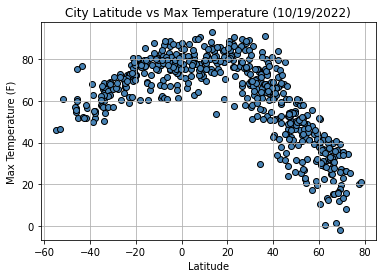

In [30]:
x_values = cities_data['Lat']
y_values = cities_data['Max Temp']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Max Temperature (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../output_data/Fig1_Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

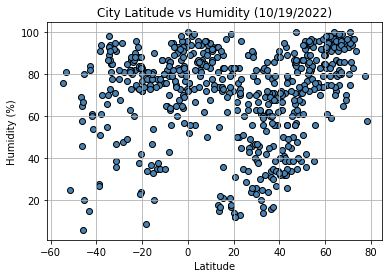

In [31]:
x_values = cities_data['Lat']
y_values = cities_data['Humidity']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Humidity (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../output_data/Fig2_Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

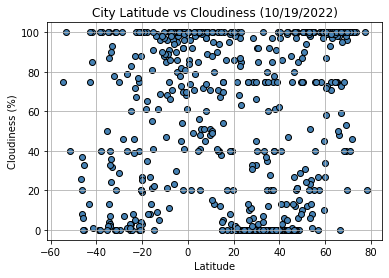

In [32]:
x_values = cities_data['Lat']
y_values = cities_data['Cloudiness']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Cloudiness (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../output_data/Fig3_Lat_vs_Cld.png")
plt.show()

## Latitude vs. Wind Speed Plot

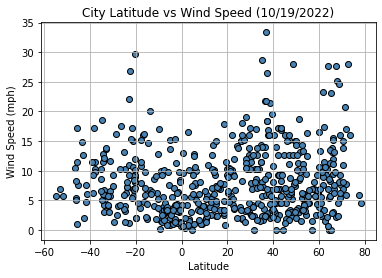

In [33]:
x_values = cities_data['Lat']
y_values = cities_data['Wind Speed']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Wind Speed (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../output_data/Fig4_Lat_vs_Wnd.png")
plt.show()

## Linear Regression

In [34]:
north_hem = cities_data[cities_data['Lat'] > 0]
south_hem = cities_data[cities_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.849919357698526


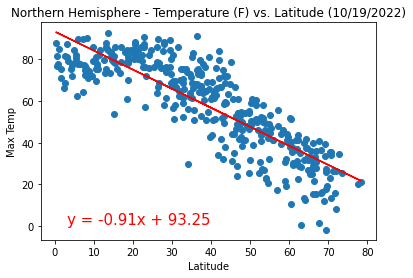

In [47]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(3,1),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7357669906827368


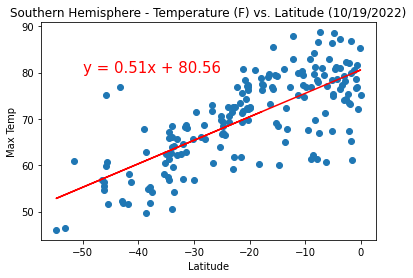

In [55]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22769625490511228


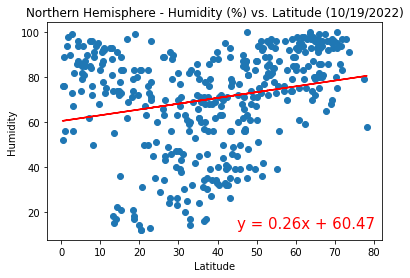

In [49]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,13),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2201121721363125


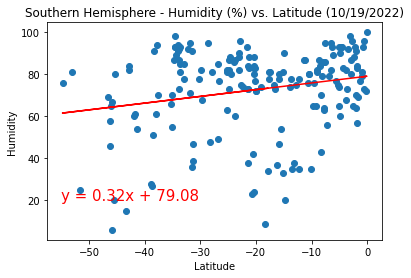

In [50]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.148852157548389


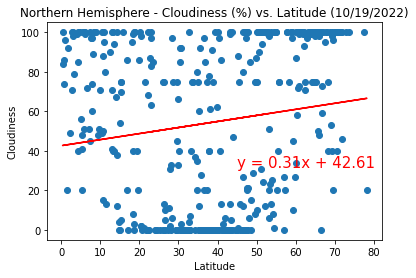

In [51]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,31.5),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.40189997310700215


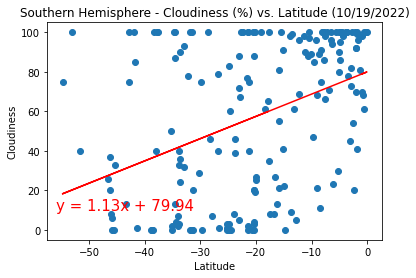

In [52]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-56,10),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19220240431357524


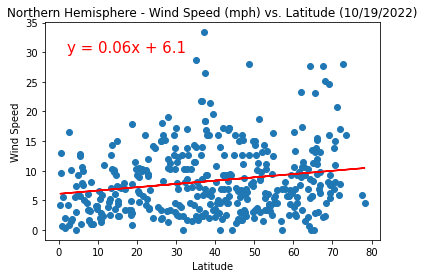

In [53]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2,30),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitudee.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2537476413638446


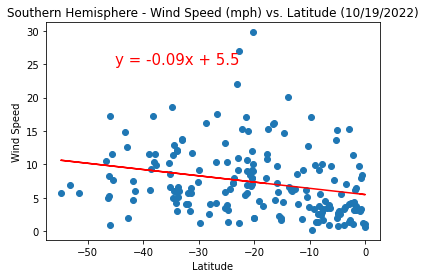

In [54]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()